### Подключение библиотек и скриптов

In [266]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LassoCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from scipy.stats import norm

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### Пути к директориям и файлам

In [267]:
TRAIN_DATASET_PATH = './train.csv'
TEST_DATASET_PATH = './test.csv'

**Описание датасета**

* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor**- количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

In [268]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.tail(n=2)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808
9999,6306,128,1.0,38.666645,21.157874,8.0,7,17.0,1990,0.000000,B,B,27,4798,0,30.0,2,8,B,218714.077615


In [269]:
train_df.shape

(10000, 20)

In [270]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.tail(n=2)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
4998,4780,62,2.0,81.305222,NaN,0.0,4,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A
4999,12504,30,2.0,60.555693,NaN,1.0,10,17.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B


### Приведение типов данных

т.к. база данных маленькая, можно сразу использовать максимально подробные функции

In [271]:
train_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

Хотя всего 2 колонки, но все-же есть незаполненные данные.

Преобразуем типы всех колонок к болле подходящим типам при помощи автоматической функции.

In [272]:
train_df = train_df.convert_dtypes()
train_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  Int64  
 1   DistrictId     10000 non-null  Int64  
 2   Rooms          10000 non-null  Int64  
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  Int64  
 6   Floor          10000 non-null  Int64  
 7   HouseFloor     10000 non-null  Int64  
 8   HouseYear      10000 non-null  Int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  string 
 11  Ecology_3      10000 non-null  string 
 12  Social_1       10000 non-null  Int64  
 13  Social_2       10000 non-null  Int64  
 14  Social_3       10000 non-null  Int64  
 15  Healthcare_1   5202 non-null   Int64  
 16  Helthcare_2    10000 non-null  Int64  
 17  Shops_1        10000 non-null  Int64  
 18  Shops_2

In [273]:
test_df = test_df.convert_dtypes()
test_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   Int64  
 1   DistrictId     5000 non-null   Int64  
 2   Rooms          5000 non-null   Int64  
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   Int64  
 6   Floor          5000 non-null   Int64  
 7   HouseFloor     5000 non-null   Int64  
 8   HouseYear      5000 non-null   Int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   string 
 11  Ecology_3      5000 non-null   string 
 12  Social_1       5000 non-null   Int64  
 13  Social_2       5000 non-null   Int64  
 14  Social_3       5000 non-null   Int64  
 15  Healthcare_1   2623 non-null   Int64  
 16  Helthcare_2    5000 non-null   Int64  
 17  Shops_1        5000 non-null   Int64  
 18  Shops_2 

По совету преподавателя приведу столбец Id к строковому типу,
чтобы алгоритмы не стали использовать его в качестве дополнительного
анализируемого признака.

In [274]:
train_df['Id'] = train_df['Id'].astype(str)
train_df['Id'].dtype

test_df['Id'] = train_df['Id'].astype(str)
test_df['Id'].dtype

dtype('O')

In [275]:
train_df['DistrictId'] = train_df['DistrictId'].astype(str)
train_df['DistrictId'].dtype

test_df['DistrictId'] = test_df['DistrictId'].astype(str)
test_df['DistrictId'].dtype

dtype('O')

## Корректировка данных для использования в моделировании

In [276]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,10000.0,1.890500,0.839512,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.315775,21.058732,1.136859,41.774881,52.513310,65.900625,6.410652e+02
LifeSquare,7887.0,37.199645,86.241209,0.370619,22.769832,32.781260,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.560917,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.775974,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218671e-01
Social_1,10000.0,24.687000,17.532614,0.000000,6.000000,25.000000,36.000000,7.400000e+01
Social_2,10000.0,5352.157400,4006.799803,168.000000,1564.000000,5285.000000,7227.000000,1.908300e+04


In [277]:
test_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,5000.0,1.910000,0.838594,0.000000,1.000000,2.000000,2.000000,17.000000
Square,5000.0,56.449500,19.092787,1.378543,41.906231,52.921340,66.285129,223.453689
LifeSquare,3959.0,36.158810,17.825287,0.333490,23.092026,32.925087,45.174091,303.071094
KitchenSquare,5000.0,5.976800,9.950018,0.000000,1.000000,6.000000,9.000000,620.000000
Floor,5000.0,8.632000,5.483228,1.000000,4.000000,7.000000,12.000000,78.000000
HouseFloor,5000.0,12.601000,6.789213,0.000000,9.000000,12.000000,17.000000,99.000000
HouseYear,5000.0,1984.392600,18.573149,1908.000000,1973.000000,1977.000000,2000.000000,2020.000000
Ecology_1,5000.0,0.119874,0.120070,0.000000,0.019509,0.072158,0.195781,0.521867
Social_1,5000.0,24.933800,17.532202,0.000000,6.000000,25.000000,36.000000,74.000000
Social_2,5000.0,5406.900000,4026.614773,168.000000,1564.000000,5285.000000,7287.000000,19083.000000


### Square, LifeSquare, KitchenSquare

LifeSquare имеет значение NULL в тестовых и в тренировочных данных. Пусть это означает, что в помещении нет жилой площади. Может техническое какое-то. Заменим это значение на 0.

In [278]:
print(train_df['LifeSquare'].isnull().sum())
print(test_df['LifeSquare'].isnull().sum())

train_df.loc[train_df['LifeSquare'].isnull(), 'LifeSquare'] = 0
test_df.loc[test_df['LifeSquare'].isnull(), 'LifeSquare'] = 0

print(train_df['LifeSquare'].isnull().sum())
print(test_df['LifeSquare'].isnull().sum())

2113
1041
0
0


1) В тестовых данных показатель 'Square' максимально равно 223,5. Необходимо понять, сколько объектов с большей площадью в тренировочных данных.

2) В тестовых данных показатель 'LifeSquare' максимально равно 303,5. Необходимо понять, сколько объектов с большей площадью в тренировочных данных.

3) В тестовых данных показатель 'KitchenSquare' максимально равно 620. Скорее всего это ошибочное значение, но оно есть в 
тестовых данных. Необходимо понять, сколько объектов с большей площадью в тренировочных данных.

In [279]:
print('--- Square ---')
print(train_df.loc[train_df['Square'] > 223.5,  'Square'])
print()
print('--- LifeSquare ---')
print(train_df.loc[train_df['LifeSquare'] > 303.5,  'LifeSquare'])
print()
print('--- LifeSquare ---')
print(train_df.loc[train_df['KitchenSquare'] > 620,  'KitchenSquare'])

--- Square ---
1982    275.645284
4262    604.705972
4690    409.425181
6977    641.065193
Name: Square, dtype: float64

--- LifeSquare ---
4328    7480.592129
4690     410.639749
6977     638.163193
8437     461.463614
Name: LifeSquare, dtype: float64

--- LifeSquare ---
1064    2014
8584    1970
Name: KitchenSquare, dtype: Int64


Всего 7 записей. Наверное ничего страшного не случится, если их просто удалить из тренировочной выборки.

In [280]:
train_df = train_df.loc[train_df['Square'] <= 223.5]
train_df = train_df.loc[train_df['LifeSquare'] <= 303.5]
train_df = train_df.loc[train_df['KitchenSquare'] <= 620]
train_df.index.size

9992

Остальные нестыковки между Square, LifeSquare, KitchenSquare пусть остаются такими, какие есть.

### HouseYear

In [281]:
print('--- HouseYear ---')
print(train_df.loc[train_df['HouseYear'] > 2020,  'HouseYear'])

--- HouseYear ---
1497    20052011
4189        4968
Name: HouseYear, dtype: Int64


Заменим 20052011 на 2005, а 4968 на 1968

In [282]:
train_df.loc[train_df['HouseYear'] == 20052011, 'HouseYear'] = 2005
train_df.loc[train_df['HouseYear'] == 4968, 'HouseYear'] = 1968

### Rooms

Мне кажется очень логичным сделать то же, что мы сделали на семинаре. Подставить медиану в те строки, где стоят явно неверные значения

In [283]:
train_df['Rooms'].value_counts()

2     3878
1     3702
3     2233
4      150
5       17
0        8
10       2
19       1
6        1
Name: Rooms, dtype: Int64

In [284]:
train_df.loc[train_df['Rooms'].isin([0, 5, 6, 10, 19]), 'Rooms'] = train_df['Rooms'].median()

### Foor, HouseFloor

В тестовом наборе данных есть 99-й этаж. И хоть это явно какое-то неверное значене, но в тестовой выборке мы ее тоже оставим.

In [285]:
train_df.loc[train_df['HouseFloor'] > 99, 'HouseFloor'] = train_df['Floor']

In [286]:
print(train_df.loc[train_df['Floor'] > train_df['HouseFloor']].index.size)

1822


In [287]:
print(test_df.loc[test_df['Floor'] > test_df['HouseFloor']].index.size)

884


Неверные, с точки зрения логики, значения встречаются как в тренировочных, так и в тестовых данных. Не очень понятна выгода в приведении их к каим-то теоретическим значениям. Вдруг есть логика в появлении ошибок и алгоритм их найдет.

### Healthcare_1

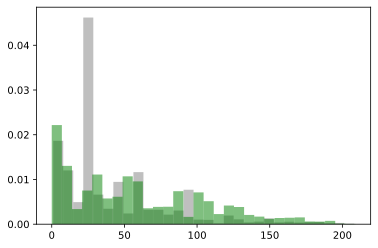

In [288]:
HC_Null = train_df.loc[train_df['Healthcare_1'].isnull(), ['DistrictId']].astype('int64')
HC_Fill = train_df.loc[train_df['Healthcare_1'].notnull(), ['DistrictId']].astype('int64')

plt.hist(HC_Null['DistrictId'].to_numpy(), bins=30, density=True, alpha=0.5, label='NULL', color='grey')
plt.hist(HC_Fill['DistrictId'].to_numpy(), bins=30, density=True, alpha=0.5, label='Not NULL', color='green')

plt.show()

Видно, что основная часть незаполненных (серых) значений находятся в кварталах с начальными номерами от 0 до 50. Но это ни на какие выводы не наводит.

Поскольку смысл значения не понятен. И NULL вполне может быть правильным значением, я просто заменю его на "0. Т.к. в заполненных даннх "0" встречается только 1 раз.

In [289]:
train_df['Healthcare_1'].value_counts()

540     511
30      347
1046    244
750     163
229     148
       ... 
370      14
32       12
1815     10
35        2
0         1
Name: Healthcare_1, Length: 79, dtype: Int64

In [290]:
train_df.loc[train_df['Healthcare_1'].isnull(), 'Healthcare_1'] = 0
test_df.loc[test_df['Healthcare_1'].isnull(), 'Healthcare_1'] = 0

In [291]:
train_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9992 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             9992 non-null   object 
 1   DistrictId     9992 non-null   object 
 2   Rooms          9992 non-null   Int64  
 3   Square         9992 non-null   float64
 4   LifeSquare     9992 non-null   float64
 5   KitchenSquare  9992 non-null   Int64  
 6   Floor          9992 non-null   Int64  
 7   HouseFloor     9992 non-null   Int64  
 8   HouseYear      9992 non-null   Int64  
 9   Ecology_1      9992 non-null   float64
 10  Ecology_2      9992 non-null   string 
 11  Ecology_3      9992 non-null   string 
 12  Social_1       9992 non-null   Int64  
 13  Social_2       9992 non-null   Int64  
 14  Social_3       9992 non-null   Int64  
 15  Healthcare_1   9992 non-null   Int64  
 16  Helthcare_2    9992 non-null   Int64  
 17  Shops_1        9992 non-null   Int64  
 18  Shops_2 

### Построение новых признаков

<AxesSubplot:>

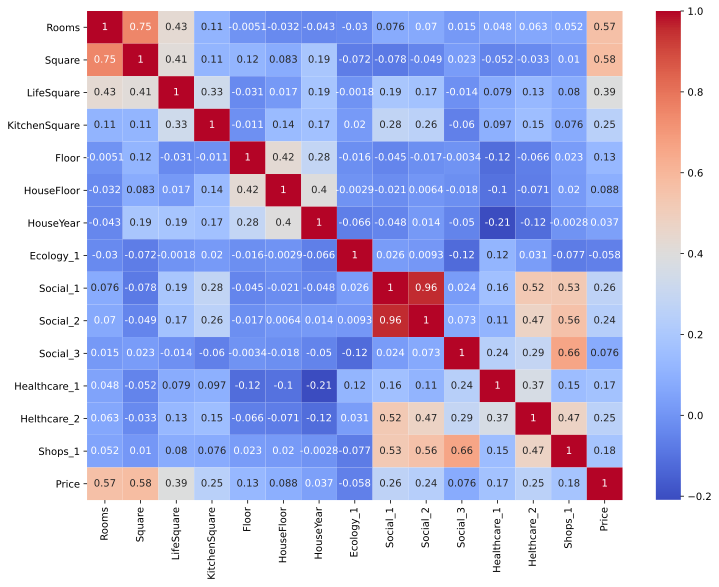

In [292]:
corrmat = train_df.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cmap='coolwarm', annot = True)

Коэффициенты коррекляции в с показателем 'Price' больше всего у параметров 'Rooms' и 'Square'. Но, если выводить эти таблицы для каждого из кварталов, то картина будет немного иной.

<AxesSubplot:>

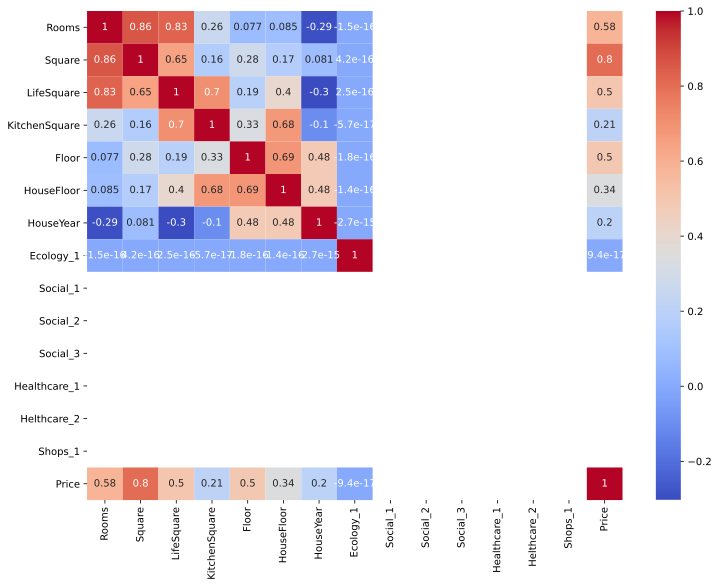

In [293]:
df_35 = train_df.loc[train_df['DistrictId']=='35']
# df_35.head()

corrmat_35 = df_35.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat_35, cmap='coolwarm', annot = True)

После разговора с преподавателем и применения правила "Location, Location, Location" я решил, что будет не совсем верно игнорировать тот факт, цена хорошо корреклирует с общей площадью в рамках каждого квартала. Поэтому решил добавить столбец 'PriceForMetr'. Рассчитываться это значение будет для каждого кваратала "DistrictID". И будет добавлено в тестовый набор. Мне кажется, что это позволит использовать категориальный признак "DistrictID" в модели машинного обучения. Помню, что с подобным методом нужно быть осторожным. Но интересно попробовать.

In [295]:
gp1 = train_df.groupby(['DistrictId'])['Square'].sum()
gp2 = train_df.groupby(['DistrictId'])['Price'].sum()
gp3 = gp2 / gp1

train_df['PriceForMetr'] = train_df['DistrictId'].map(gp3.to_dict())
test_df['PriceForMetr'] = test_df['DistrictId'].map(gp3.to_dict())

test_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   object 
 1   DistrictId     5000 non-null   object 
 2   Rooms          5000 non-null   Int64  
 3   Square         5000 non-null   float64
 4   LifeSquare     5000 non-null   float64
 5   KitchenSquare  5000 non-null   Int64  
 6   Floor          5000 non-null   Int64  
 7   HouseFloor     5000 non-null   Int64  
 8   HouseYear      5000 non-null   Int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   string 
 11  Ecology_3      5000 non-null   string 
 12  Social_1       5000 non-null   Int64  
 13  Social_2       5000 non-null   Int64  
 14  Social_3       5000 non-null   Int64  
 15  Healthcare_1   5000 non-null   Int64  
 16  Helthcare_2    5000 non-null   Int64  
 17  Shops_1        5000 non-null   Int64  
 18  Shops_2 

К сожалению, не все значения заполнились. Придется дополнить медианными значениями.

In [297]:
test_df.loc[test_df['PriceForMetr'].isnull(), 'PriceForMetr'] = train_df['PriceForMetr'].median()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   object 
 1   DistrictId     5000 non-null   object 
 2   Rooms          5000 non-null   Int64  
 3   Square         5000 non-null   float64
 4   LifeSquare     5000 non-null   float64
 5   KitchenSquare  5000 non-null   Int64  
 6   Floor          5000 non-null   Int64  
 7   HouseFloor     5000 non-null   Int64  
 8   HouseYear      5000 non-null   Int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   string 
 11  Ecology_3      5000 non-null   string 
 12  Social_1       5000 non-null   Int64  
 13  Social_2       5000 non-null   Int64  
 14  Social_3       5000 non-null   Int64  
 15  Healthcare_1   5000 non-null   Int64  
 16  Helthcare_2    5000 non-null   Int64  
 17  Shops_1        5000 non-null   Int64  
 18  Shops_2 

Решил, что на последнем занятии был придуман очень хороший способ преобразования 'Ecology_2', 'Ecology_3', 'Shops_2' в бинарные признаки.

In [298]:
for cat_colname in ['Ecology_2', 'Ecology_3', 'Shops_2']:
    print(str(cat_colname) + ' in train \n\n' + str(train_df[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')
    print(str(cat_colname) + ' in test \n\n' + str(test_df[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Ecology_2 in train 

B    9895
A      97
Name: Ecology_2, dtype: Int64
****************************************************************************************************

Ecology_2 in test 

B    4952
A      48
Name: Ecology_2, dtype: Int64
****************************************************************************************************

Ecology_3 in train 

B    9718
A     274
Name: Ecology_3, dtype: Int64
****************************************************************************************************

Ecology_3 in test 

B    4851
A     149
Name: Ecology_3, dtype: Int64
****************************************************************************************************

Shops_2 in train 

B    9168
A     824
Name: Shops_2, dtype: Int64
****************************************************************************************************

Shops_2 in test 

B    4588
A     412
Name: Shops_2, dtype: Int64
***************************************************************************

In [299]:
train_df['Ecology_2_bin'] = train_df['Ecology_2'].replace({'A':0, 'B':1})
train_df['Ecology_3_bin'] = train_df['Ecology_3'].replace({'A':0, 'B':1})
train_df['Shops_2_bin'] = train_df['Shops_2'].replace({'A':0, 'B':1})

test_df['Ecology_2_bin'] = test_df['Ecology_2'].replace({'A':0, 'B':1})
test_df['Ecology_3_bin'] = test_df['Ecology_3'].replace({'A':0, 'B':1})
test_df['Shops_2_bin'] = test_df['Shops_2'].replace({'A':0, 'B':1})

### Дополнитеьные функции

In [300]:
def model_test_procedure(model, name, X_part, y_part, s_color='blue'):
    """
    # Функция применяет модель к заданным данным. И проверяет отклонение от целевых значений.
    
    # Параметры:
    1) model - обученная модель;
    2) name - заголовок на выводимом графике
    3) X_part - данные к которым будет применена модель
    4) y_part - правильные целевые значения.
    5) s_color - цветовая схема графика. По-умолчанию - синий.
    

    # Процедура должна рассчитать среднее квадратичное отклонеие и построить график.

    """
    model_pred = model.predict(X_part)
    r2 = r2_score(y_part, model_pred)
    mse = mean_squared_error(y_part, model_pred)
    plt.scatter(y_part, (model_pred - y_part), color=s_color)
    plt.xlabel("Predicted values")
    plt.ylabel("Real values")
    plt.title(name)
    plt.legend([f'R2= {r2:.4f} and mse= {mse:.0e}'])
    plt.axhline(0, color='red')
    plt.show()

### Построение модели

In [301]:
features = train_df.select_dtypes(exclude=['object', 'string', 'category']).columns.tolist()
features.remove('Price')
print(features)

target = 'Price'

['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'PriceForMetr', 'Ecology_2_bin', 'Ecology_3_bin', 'Shops_2_bin']


In [302]:
X_train, X_test, y_train, y_test = train_test_split(
    train_df[features], train_df[target], test_size=0.3, random_state=42)

In [303]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6994 entries, 3174 to 7276
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          6994 non-null   Int64  
 1   Square         6994 non-null   float64
 2   LifeSquare     6994 non-null   float64
 3   KitchenSquare  6994 non-null   Int64  
 4   Floor          6994 non-null   Int64  
 5   HouseFloor     6994 non-null   Int64  
 6   HouseYear      6994 non-null   Int64  
 7   Ecology_1      6994 non-null   float64
 8   Social_1       6994 non-null   Int64  
 9   Social_2       6994 non-null   Int64  
 10  Social_3       6994 non-null   Int64  
 11  Healthcare_1   6994 non-null   Int64  
 12  Helthcare_2    6994 non-null   Int64  
 13  Shops_1        6994 non-null   Int64  
 14  PriceForMetr   6994 non-null   float64
 15  Ecology_2_bin  6994 non-null   int64  
 16  Ecology_3_bin  6994 non-null   int64  
 17  Shops_2_bin    6994 non-null   int64  
dtypes: In

In [304]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2998 entries, 4026 to 409
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          2998 non-null   Int64  
 1   Square         2998 non-null   float64
 2   LifeSquare     2998 non-null   float64
 3   KitchenSquare  2998 non-null   Int64  
 4   Floor          2998 non-null   Int64  
 5   HouseFloor     2998 non-null   Int64  
 6   HouseYear      2998 non-null   Int64  
 7   Ecology_1      2998 non-null   float64
 8   Social_1       2998 non-null   Int64  
 9   Social_2       2998 non-null   Int64  
 10  Social_3       2998 non-null   Int64  
 11  Healthcare_1   2998 non-null   Int64  
 12  Helthcare_2    2998 non-null   Int64  
 13  Shops_1        2998 non-null   Int64  
 14  PriceForMetr   2998 non-null   float64
 15  Ecology_2_bin  2998 non-null   int64  
 16  Ecology_3_bin  2998 non-null   int64  
 17  Shops_2_bin    2998 non-null   int64  
dtypes: Int

In [305]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)


RandomForestRegressor()

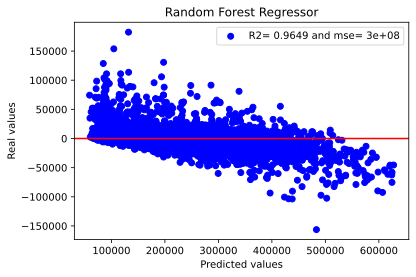

In [306]:
model_test_procedure(rf_model, 'Random Forest Regressor', X_train, y_train)

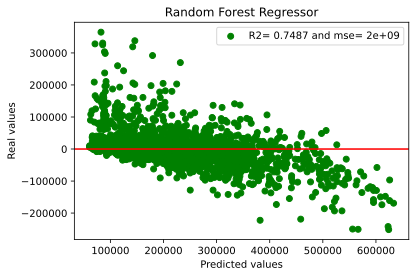

In [307]:
model_test_procedure(rf_model, 'Random Forest Regressor', X_test, y_test, 'green')

In [308]:
cv_score = cross_val_score(
    rf_model,
    train_df[features],
    train_df[target],
    scoring='r2',
    cv=KFold(n_splits=5, shuffle=True, random_state=1)
)
cv_score

array([0.7778361 , 0.73336906, 0.76785848, 0.75854507, 0.72387558])

Это лучший результат.


в моделе **"Linear Regression"** 

R2 = 0.6864 на тренировочных данных и 0.6660 на контрольных. mse = 0.3 * 10^(-8)

cv_core array([0.6989059 , 0.67764745, 0.68884058, 0.67406443, 0.65092723])


в моделе **"Gradient Boosting Regressor"** 

R2 = 0.7994 на тренировочных данных и 0.7523 на контрольных. mse = 0.2 * 10^(-8)

cv_core array([0.77034726, 0.73260236, 0.75967304, 0.76001223, 0.71956191])


в моделе **"Lasso CV"** 

R2 = 0.6616 на тренировочных данных и 0.6530 на контрольных. mse = 0.3 * 10^(-8)

cv_core array([0.67316517, 0.65700027, 0.66619273, 0.65664896, 0.63159196])



Поэтому для оценки квартир из test_df буду пользоваться моделью **Random Forest Regressor**

### Расчет цены в тестовых данных. И выгрузка в файл csv.

In [309]:
features

['Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'PriceForMetr',
 'Ecology_2_bin',
 'Ecology_3_bin',
 'Shops_2_bin']

In [310]:
best_model = RandomForestRegressor()
best_model.fit(train_df[features], train_df[target])

RandomForestRegressor()

In [311]:
test_df['Price'] = best_model.predict(test_df[features])

In [312]:
test_df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,PriceForMetr,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,Price
0,14038,58,2,49.882643,33.432782,6,6,14,1972,0.310199,...,1,0,0,0,B,2957.990008,1,1,1,163751.735557
1,15053,74,2,69.263183,0.000000,1,6,1,1977,0.075779,...,3,0,0,2,B,3272.322491,1,1,1,220985.675724
2,4765,190,1,13.597819,15.948246,12,2,5,1909,0.000000,...,87,4702,5,5,B,7735.224377,1,1,1,237479.248893
3,5809,47,2,73.046609,51.940842,9,22,22,2007,0.101872,...,3,0,3,3,B,4063.439258,1,1,1,320739.243419
4,10783,27,1,47.527111,43.387569,1,17,17,2017,0.072158,...,1,0,0,0,A,2715.796729,1,1,0,148971.615981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,6839,11,3,67.133911,50.809797,6,5,9,1973,0.000170,...,0,0,1,1,B,3997.872947,1,1,1,240641.049712
4996,12823,1,1,40.198472,21.807061,10,12,17,2017,0.007122,...,0,0,0,1,B,3175.209200,1,1,1,135795.709290
4997,803,12,3,77.842178,48.282625,9,23,22,1989,0.090799,...,2,0,5,15,B,4061.853520,1,1,1,336991.473422
4998,9649,62,2,81.305222,0.000000,0,4,0,1977,0.072158,...,1,0,0,0,A,2677.872755,1,1,0,195662.697145


In [313]:
test_df[['Id', 'Price']].to_csv('MGasilin_predictions.csv', index=None)